In [1]:
import  numpy as np
import matplotlib.pyplot as plt
def generate_data(n, M = 2.0, B = 5.0, X_MIN = 0.0, X_MAX = 30.0):
      
      n_samples = n
      random = np.random.RandomState(1)  # RandomState Seeding

      # create random x values
      x1 = random.uniform(low=X_MIN, high=X_MAX, size=n_samples).reshape(n_samples, 1) 

      # calculate x2 values along the line
      x2 = M * x1 + B

      # add random noise
      x2 += random.normal(loc=0.0, scale=5.0, size=x2.shape).reshape(n_samples, 1)
      X = np.concatenate([np.round(x1,2), np.round(x2,2)], axis=1)
      return X 

X = generate_data(25)
 

In [2]:
#normalize
# normalize
X[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

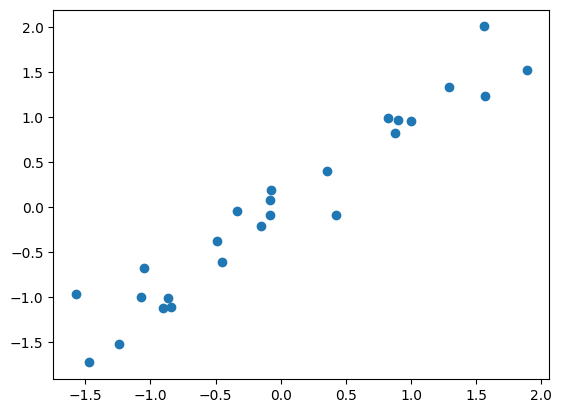

In [3]:
plt.scatter(X[:,0],X[:,1])

## Covariance Matrix

In [5]:
cov = np.dot(X.T,X)
cov

array([[25.        , 24.12294297],
       [24.12294297, 25.        ]])

In [6]:
e_values, e_vectors = np.linalg.eig(cov)

In [10]:
e_values

array([ 0.87705703, 49.12294297])

In [8]:
e_vectors

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

## Principal Components

In [30]:
idx = e_values.argsort()[::-1]
e_values = e_values[idx]
principle_components = e_vectors[:,idx]

In [31]:
principle_components

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [32]:
no_of_pc = principle_components.shape[1]
explained_variance = []

In [33]:
for i in range(no_of_pc):
    variance = (e_values[i] / sum(np.diagonal(cov))*100)
    explained_variance.append(variance)
            

In [34]:
explained_variance

[np.float64(98.24588594597589), np.float64(1.754114054024121)]

## Projecting the data into principal components

In [35]:
U = principle_components[:,0].reshape(-1,1)

In [36]:
U

array([[-0.70710678],
       [-0.70710678]])

In [38]:
x_reduced = np.dot(U.T,X.T).T

In [40]:
x_reduced.shape

(25, 1)

In [42]:
from sklearn.decomposition import PCA

In [43]:
pca = PCA(n_components=1, random_state=99)

In [44]:
X_red =pca.fit_transform(X)

In [46]:
pca.explained_variance_ratio_

array([0.98245886])

In [47]:
pca.components_

array([[0.70710678, 0.70710678]])